## Import dataset

In [1]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('795813_1365687_bundle_archive/input_bcell.csv')

dataset.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


## Check columns

In [2]:
dataset.columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'target'],
      dtype='object')

## Search for null values

In [3]:
dataset.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

## Search for categorical columns

In [4]:
for col in dataset.columns:
    x = dataset[col].unique()
    if len(x) < 20:
        print(f"{col}: {x}")

target: [1 0]


## Remove irrelevant features and get input data

In [5]:
X = dataset.drop(columns=['parent_protein_id', 'protein_seq', 'peptide_seq', 'target'])
X.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,161,165,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300
1,251,255,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512
2,145,149,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333
3,152,156,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373
4,85,89,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615


## Get output data

In [6]:
y = dataset['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Apply feature scaling

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X

array([[-0.3863855 , -0.40451394,  0.17066955, ...,  1.06912809,
         0.66463514, -0.20564963],
       [-0.13195355, -0.15007612, -1.80099114, ..., -0.39782531,
         0.93560006, -1.12130643],
       [-0.43161785, -0.44974733, -1.14377091, ...,  0.62331337,
         3.25724616, -0.9495729 ],
       ...,
       [-0.3072289 , -0.29708464, -1.39223222, ..., -0.15555999,
        -0.7475483 ,  0.19010766],
       [ 3.33962909,  3.34985741,  0.59545824, ..., -1.21820059,
        -0.67131514, -0.8518031 ],
       [ 3.81456874,  3.824808  , -0.26213401, ..., -1.21820059,
        -0.67131514, -0.8518031 ]])

## Split data in training and test sets

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

## Build ANN

In [9]:
# Imports
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 300)

Epoch 1/300
1295/1295 [==============================] - 1s 867us/step - loss: 0.6031 - accuracy: 0.7275
Epoch 2/300
1295/1295 [==============================] - 1s 855us/step - loss: 0.5854 - accuracy: 0.7280
Epoch 3/300
1295/1295 [==============================] - 1s 852us/step - loss: 0.5854 - accuracy: 0.7280
Epoch 4/300
1295/1295 [==============================] - 1s 853us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 5/300
1295/1295 [==============================] - 1s 853us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 6/300
1295/1295 [==============================] - 1s 861us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 7/300
1295/1295 [==============================] - 1s 849us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 8/300
1295/1295 [==============================] - 1s 853us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 9/300
1295/1295 [==============================] - 1s 892us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 10/300
1295/1295 [==============================]

1295/1295 [==============================] - 1s 863us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 155/300
1295/1295 [==============================] - 1s 844us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 156/300
1295/1295 [==============================] - 1s 843us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 157/300
1295/1295 [==============================] - 1s 856us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 158/300
1295/1295 [==============================] - 1s 853us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 159/300
1295/1295 [==============================] - 1s 853us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 160/300
1295/1295 [==============================] - 1s 864us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 161/300
1295/1295 [==============================] - 1s 887us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 162/300
1295/1295 [==============================] - 1s 902us/step - loss: 0.5853 - accuracy: 0.7280
Epoch 163/300
1295/1295 [==========================

## Save the ANN

In [10]:
# Save the model
classifier.save('test-abc-v01.h5')

# Save a dictionary into a pickle file.
import pickle
pickle.dump( sc, open( "test-abc-v01.p", "wb" ) )

## Predict over test set and check confusion matrix

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[976,  83],
       [196, 184]], dtype=int64)

<AxesSubplot:>

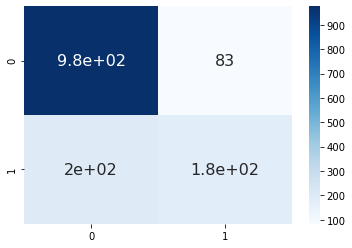

In [12]:
import seaborn as sn
sn.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Get final ANN accuracy over test set

In [13]:
from sklearn.metrics import accuracy_score

print('VALIDATION ACCURACY', accuracy_score(y_test, y_pred))

VALIDATION ACCURACY 0.8061153578874218


In [16]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_pred, y_test)

0.76095154094924

## Get SARS data

In [17]:
sars = pd.read_csv('795813_1365687_bundle_archive/input_sars.csv')

sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


In [18]:
sars.columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability',
       'target'],
      dtype='object')

In [19]:
sars.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [20]:
X_sars = sars.drop(columns=['parent_protein_id', 'protein_seq', 'peptide_seq', 'target'])
X_sars.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,1,17,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116
1,1,15,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116
2,2,10,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116
3,6,20,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116
4,9,25,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116


In [21]:
y_sars = sars['target']
y_sars.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [22]:
X_sars = sc.transform(X_sars)

X_sars

array([[-0.83870898, -0.8229228 , -0.86325008, ...,  1.57599021,
         0.87424551, -0.6293564 ],
       [-0.83870898, -0.82857697, -1.00751794, ...,  1.57599021,
         0.87424551, -0.6293564 ],
       [-0.83588195, -0.8427124 , -2.99520839, ...,  1.57599021,
         0.87424551, -0.6293564 ],
       ...,
       [ 2.65266282,  2.67701074,  0.21074396, ...,  1.57599021,
         0.87424551, -0.6293564 ],
       [ 2.65266282,  2.6628753 ,  0.45119039, ...,  1.57599021,
         0.87424551, -0.6293564 ],
       [ 2.66679793,  2.67701074,  0.26684812, ...,  1.57599021,
         0.87424551, -0.6293564 ]])

In [23]:
# Predicting the Test set results

y_sars_pred = classifier.predict(X_sars)
y_sars_pred = (y_sars_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_sars, y_sars_pred)

cm

array([[289,  91],
       [ 92,  48]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score

print('VALIDATION ACCURACY', accuracy_score(y_sars, y_sars_pred))

VALIDATION ACCURACY 0.6480769230769231


In [25]:
roc_auc_score(y_sars_pred, y_sars)

0.5519269623671142